#Phase II 

# Importing necessary libraries 

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sn  # for data visualization

import cv2
from random import randint as rint

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics

# libraries for CNN model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
import tensorflow as tf
import keras


# Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##Changing directory 

In [ ]:
% cd /content/drive/MyDrive/Neural Network Project/

/content/drive/MyDrive/Neural Network Project


###Locating train and test directories 

In [ ]:
train_dir = 'mri_dataset/Training/'
test_dir = 'mri_dataset/Testing/'

#Function to import images 

In [ ]:
Classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

def read_img_labels(_dir):
  Images, labels = [], []
  for root, dirs, files in os.walk(_dir):
    f = os.path.basename(root)
    for file in files:
      labels.append(f)
      try:
        image = cv2.imread(root+'/'+file, -1)  #read image in grayscale
        image = cv2.resize(image, (200,200)) #make image of equal dimension
        Images.append(image)
      except Exception as e:
        print(e)
  Images = np.array(Images)
  return (Images, labels)


def get_class_index(labels):
    for i, j  in enumerate(labels):
      for k, n in enumerate(Classes):
        if j == n:
          labels[i] = k
    labels = np.array(labels)
    return labels

##Import train labels and train images 

In [ ]:
train_imgs, train_lbls = read_img_labels(train_dir)
train_lbls = get_class_index(train_lbls)

print('Shape of train images: {}'.format(train_imgs.shape))
print('Shape of train labels: {}'.format(train_lbls.shape))

Shape of train images: (2870, 200, 200, 3)
Shape of train labels: (2870,)


##Import test labels and test images 

In [ ]:
test_imgs, test_lbls = read_img_labels(test_dir)
test_lbls = get_class_index(test_lbls)

print('Shape of test images: {}'.format(test_imgs.shape))
print('Shape of test labels: {}'.format(test_lbls.shape))

Shape of test images: (394, 200, 200, 3)
Shape of test labels: (394,)


#Train-Validation split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_imgs, train_lbls, shuffle = True, test_size = 0.25, random_state = 42)
print('Shape of X_train: {} , y_train: {}'.format(X_train.shape,y_train.shape))
print('Shape of X_val: {} , y_val: {}'.format(X_val.shape,y_val.shape))

Shape of X_train: (2152, 200, 200, 3) , y_train: (2152,)
Shape of X_val: (718, 200, 200, 3) , y_val: (718,)


#Model Summary function

In [ ]:
def getmetricsReport(yTrue, yPred):
  conf = metrics.confusion_matrix(yTrue, yPred)
  acc = metrics.accuracy_score(yTrue, yPred)
  f1 = metrics.f1_score(yTrue, yPred, average='micro')
  print ("Confusion Matrix")
  print (conf)
  print()
  scores = {'accuracy': acc,'f1_score': f1,}
  for m, val in scores.items():
    print (f"{m}:\t{val:.4f}")
  
  plt.figure(figsize = (10,10))
  s=sn.heatmap(conf, xticklabels = Classes, yticklabels = Classes, cmap = 'Blues', annot=True)
  s.set(xlabel='Predicted Label', ylabel='True Label')
  return scores

#Model Graphical analysis

In [ ]:
def get_graph(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs, acc, 'r', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.ylabel('accuracy') 
  plt.xlabel('epoch')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.ylabel('Loss') 
  plt.xlabel('epoch')
  plt.legend()
  plt.show()
  return 

#CNN Model

In [ ]:
def base_model():
  model = Sequential() 
  model.add(Conv2D(32, (3,3), activation = 'relu', strides=(1,1), input_shape = (200, 200, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3,3), activation = 'relu', padding='valid', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(Conv2D(64, (3,3), activation = 'relu', padding='valid', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(Conv2D(128, (3,3), activation = 'relu', padding='same', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(Conv2D(128, (3,3), activation = 'relu', padding='same', strides=(1,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  opt = tf.keras.optimizers.Adam(lr=0.001)
  loss = tf.keras.losses.sparse_categorical_crossentropy
  model.compile(optimizer = opt, loss = loss, metrics = ['acc'])
  return model
model = base_model()
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_213 (Conv2D)         (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_213 (MaxPooli  (None, 99, 99, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_214 (Conv2D)         (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_214 (MaxPooli  (None, 48, 48, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_215 (Conv2D)         (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_215 (MaxPooli  (None, 23, 23, 64)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


##Fitting CNN model 

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/30
34/34 [==============================] - 5s 106ms/step - loss: 4.7796 - acc: 0.4103 - val_loss: 1.0471 - val_acc: 0.5474
Epoch 2/30
34/34 [==============================] - 3s 80ms/step - loss: 1.0349 - acc: 0.5586 - val_loss: 0.9186 - val_acc: 0.6616
Epoch 3/30
34/34 [==============================] - 3s 79ms/step - loss: 0.8537 - acc: 0.6371 - val_loss: 0.7981 - val_acc: 0.7047
Epoch 4/30
34/34 [==============================] - 3s 80ms/step - loss: 0.6976 - acc: 0.7165 - val_loss: 0.6826 - val_acc: 0.7270
Epoch 5/30
34/34 [==============================] - 3s 80ms/step - loss: 0.5546 - acc: 0.7760 - val_loss: 0.6280 - val_acc: 0.7646
Epoch 6/30
34/34 [==============================] - 3s 79ms/step - loss: 0.4193 - acc: 0.8425 - val_loss: 0.5504 - val_acc: 0.7813
Epoch 7/30
34/34 [==============================] - 3s 80ms/step - loss: 0.3441 - acc: 0.8769 - val_loss: 0.5564 - val_acc: 0.7925
Epoch 8/30
34/34 [==============================] - 3s 80ms/step - loss: 0.3217 - 

##Graphical analysis



##Validation and test dataset performance analysis

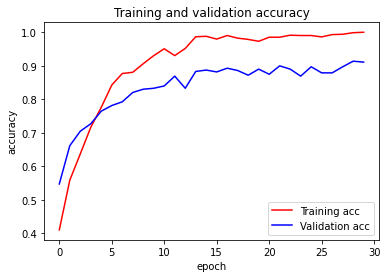

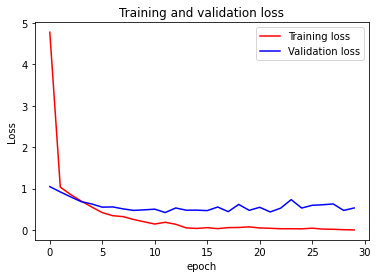

Performance on validation set:
Confusion Matrix
[[178  11   0   3]
 [ 16 185   7   9]
 [  2  11  82   2]
 [  1   0   2 209]]

accuracy:	0.9109
f1_score:	0.9109
Performance on test set:
                  precision    recall  f1-score   support

    glioma_tumor       0.95      0.19      0.32       100
meningioma_tumor       0.62      0.90      0.73       115
        no_tumor       0.69      0.92      0.79       105
 pituitary_tumor       0.89      0.78      0.83        74

        accuracy                           0.71       394
       macro avg       0.79      0.70      0.67       394
    weighted avg       0.77      0.71      0.66       394

Confusion Matrix
[[ 19  46  31   4]
 [  0 104   8   3]
 [  1   7  97   0]
 [  0  11   5  58]]

accuracy:	0.7056
f1_score:	0.7056


{'accuracy': 0.7055837563451777, 'f1_score': 0.7055837563451777}

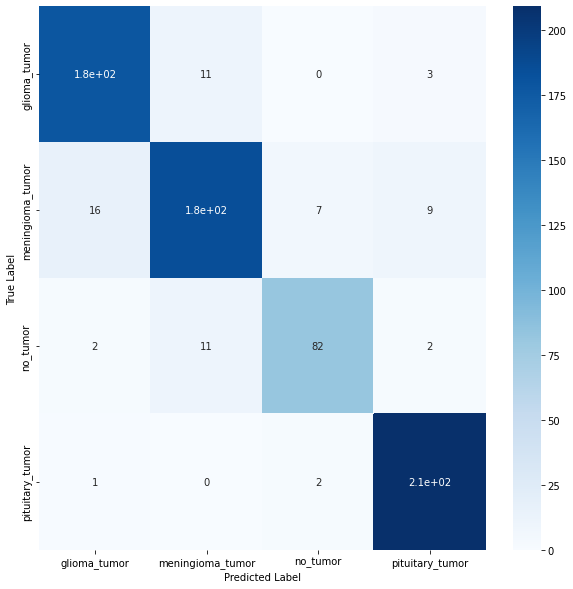

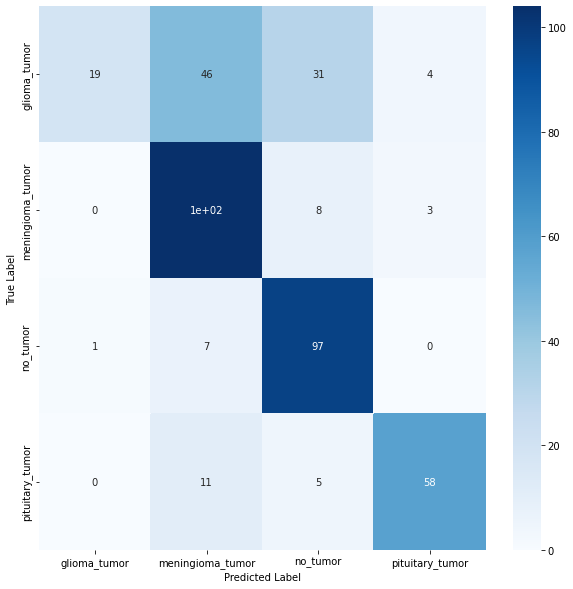

In [ ]:
get_graph(history)


print('Performance on validation set:')
yPred=model.predict(X_val)
yPred=np.argmax(yPred,axis=1)
getmetricsReport(y_val, yPred)

print('Performance on test set:')
yPred=model.predict(test_imgs)
yPred=np.argmax(yPred,axis=1)
lab =['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
classification_metrics = metrics.classification_report(test_lbls, yPred, target_names = lab)
print(classification_metrics)
getmetricsReport(test_lbls, yPred)

##Sorting 16 properly and wrongly classified tumor

In [ ]:

i=0
prop_class=[]
mis_class=[]

for i in range(len(y_val)):
    if(y_val[i] == yPred[i]):
        prop_class.append(i)
    if(len(prop_class)==16):
        break

i=0
for i in range(len(y_val)):
    if(y_val[i] != yPred[i]):
        mis_class.append(i)
    if(len(mis_class)==16):
        break


##Correct classification 

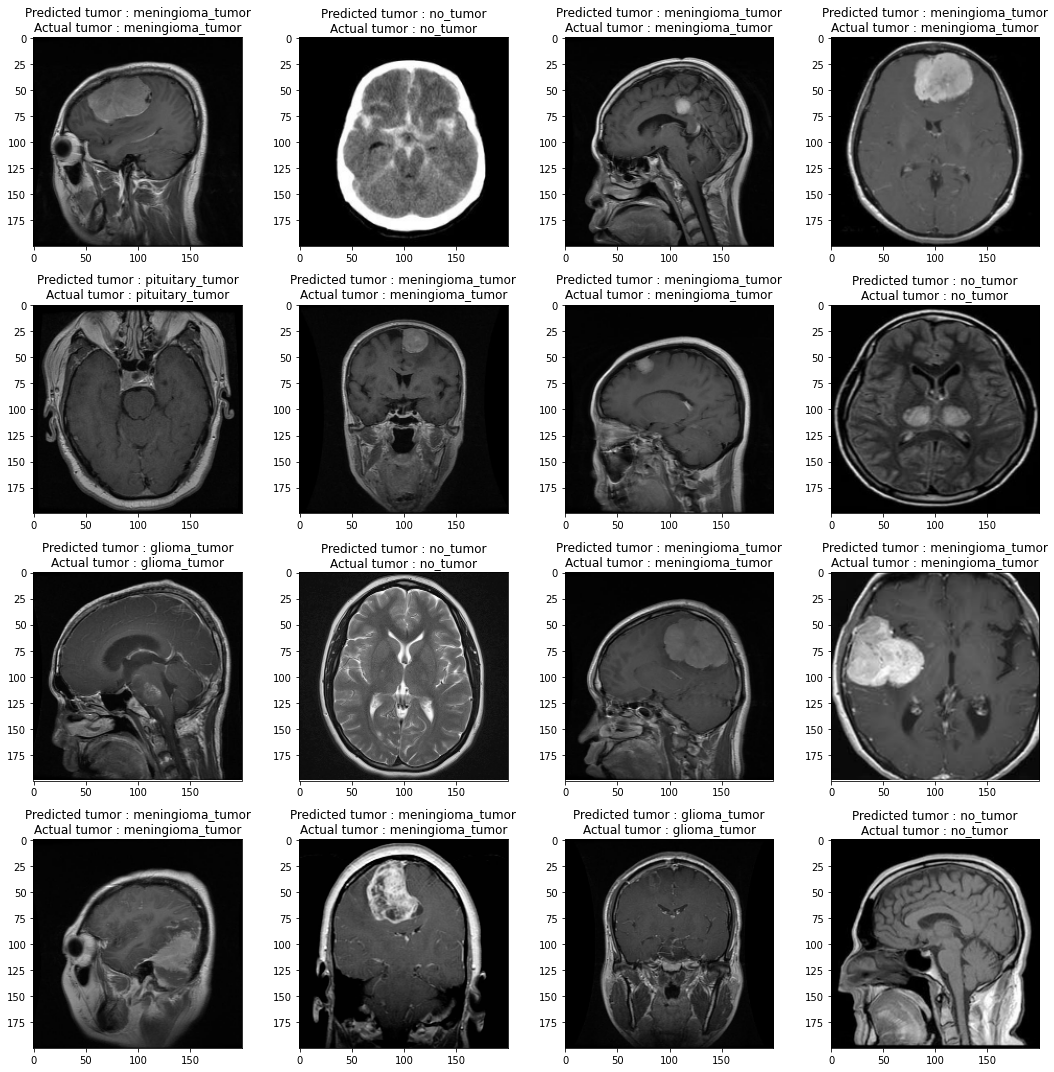

In [ ]:
# image with correct prediction and actual class
count=0
X_correct = np.zeros([16,X_val.shape[1], X_val.shape[2], X_val.shape[3]])
fig,ax=plt.subplots(4,4)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (4):
        ax[i,j].imshow(X_val[prop_class[count]])
        ax[i,j].set_title("Predicted tumor : "+ Classes[yPred[prop_class[count]]] +"\n"+"Actual tumor : "+ Classes[y_val[prop_class[count]]])
        plt.tight_layout()
        X_correct[count] = np.copy(X_val[prop_class[count]])
        count+=1

##Incorrect prediction



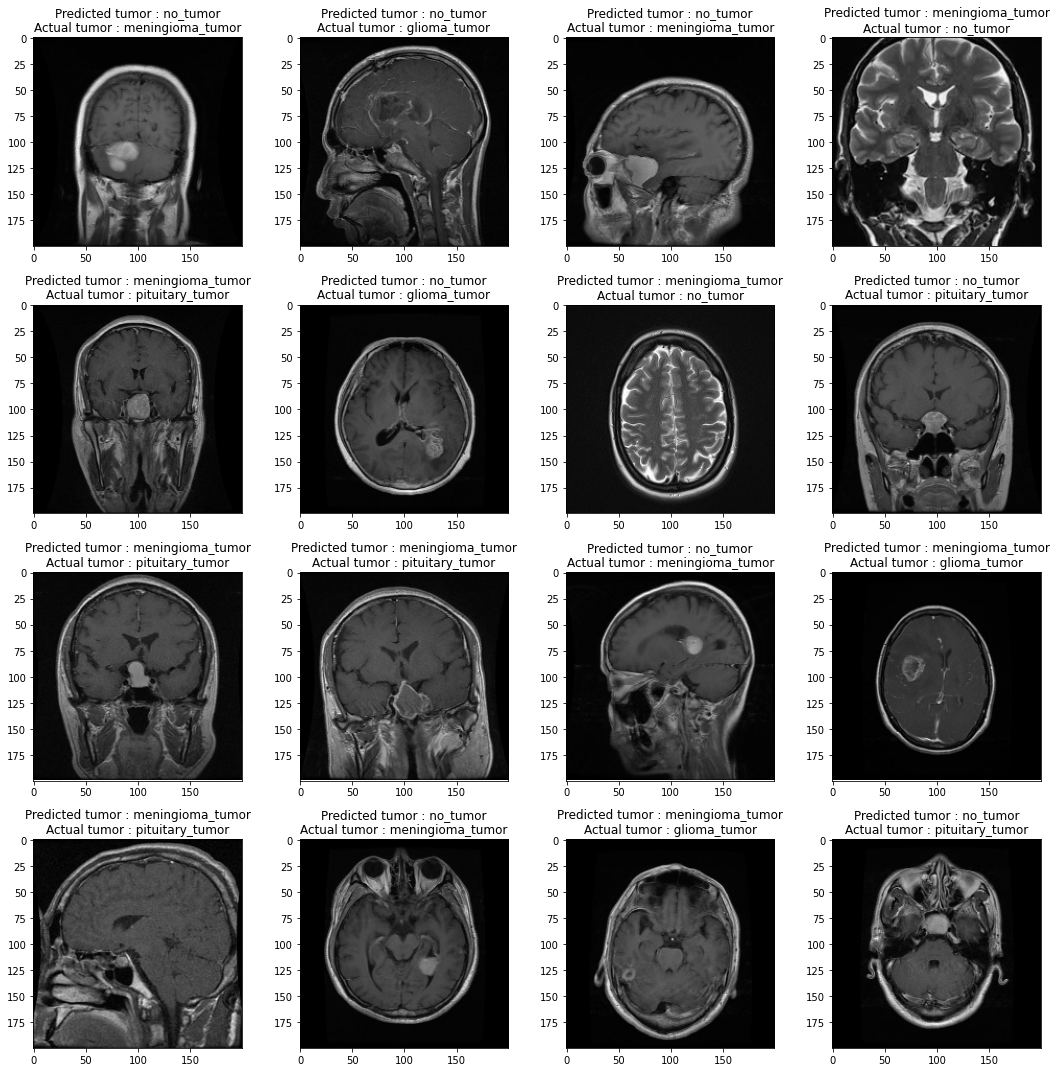

In [ ]:
# image with incorrect prediction and actual class
count=0
X_incorrect = np.zeros([16,X_val.shape[1], X_val.shape[2], X_val.shape[3]])
fig,ax=plt.subplots(4,4)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (4):
        ax[i,j].imshow(X_val[mis_class[count]])
        ax[i,j].set_title("Predicted tumor : "+Classes[yPred[mis_class[count]]]+"\n"+"Actual tumor : "+Classes[y_val[mis_class[count]]])
        plt.tight_layout()
        X_incorrect[count] = np.copy(X_val[mis_class[count]])
        count+=1

#**CNN Model Visualization**

## Filter Visualization

In [ ]:
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters, bias = layer.get_weights()
    print(layer.name , filters.shape)

conv2d_213 (3, 3, 3, 32)
conv2d_214 (3, 3, 32, 64)
conv2d_215 (3, 3, 64, 64)
conv2d_216 (3, 3, 64, 128)
conv2d_217 (3, 3, 128, 128)


In [ ]:
filters,bias = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

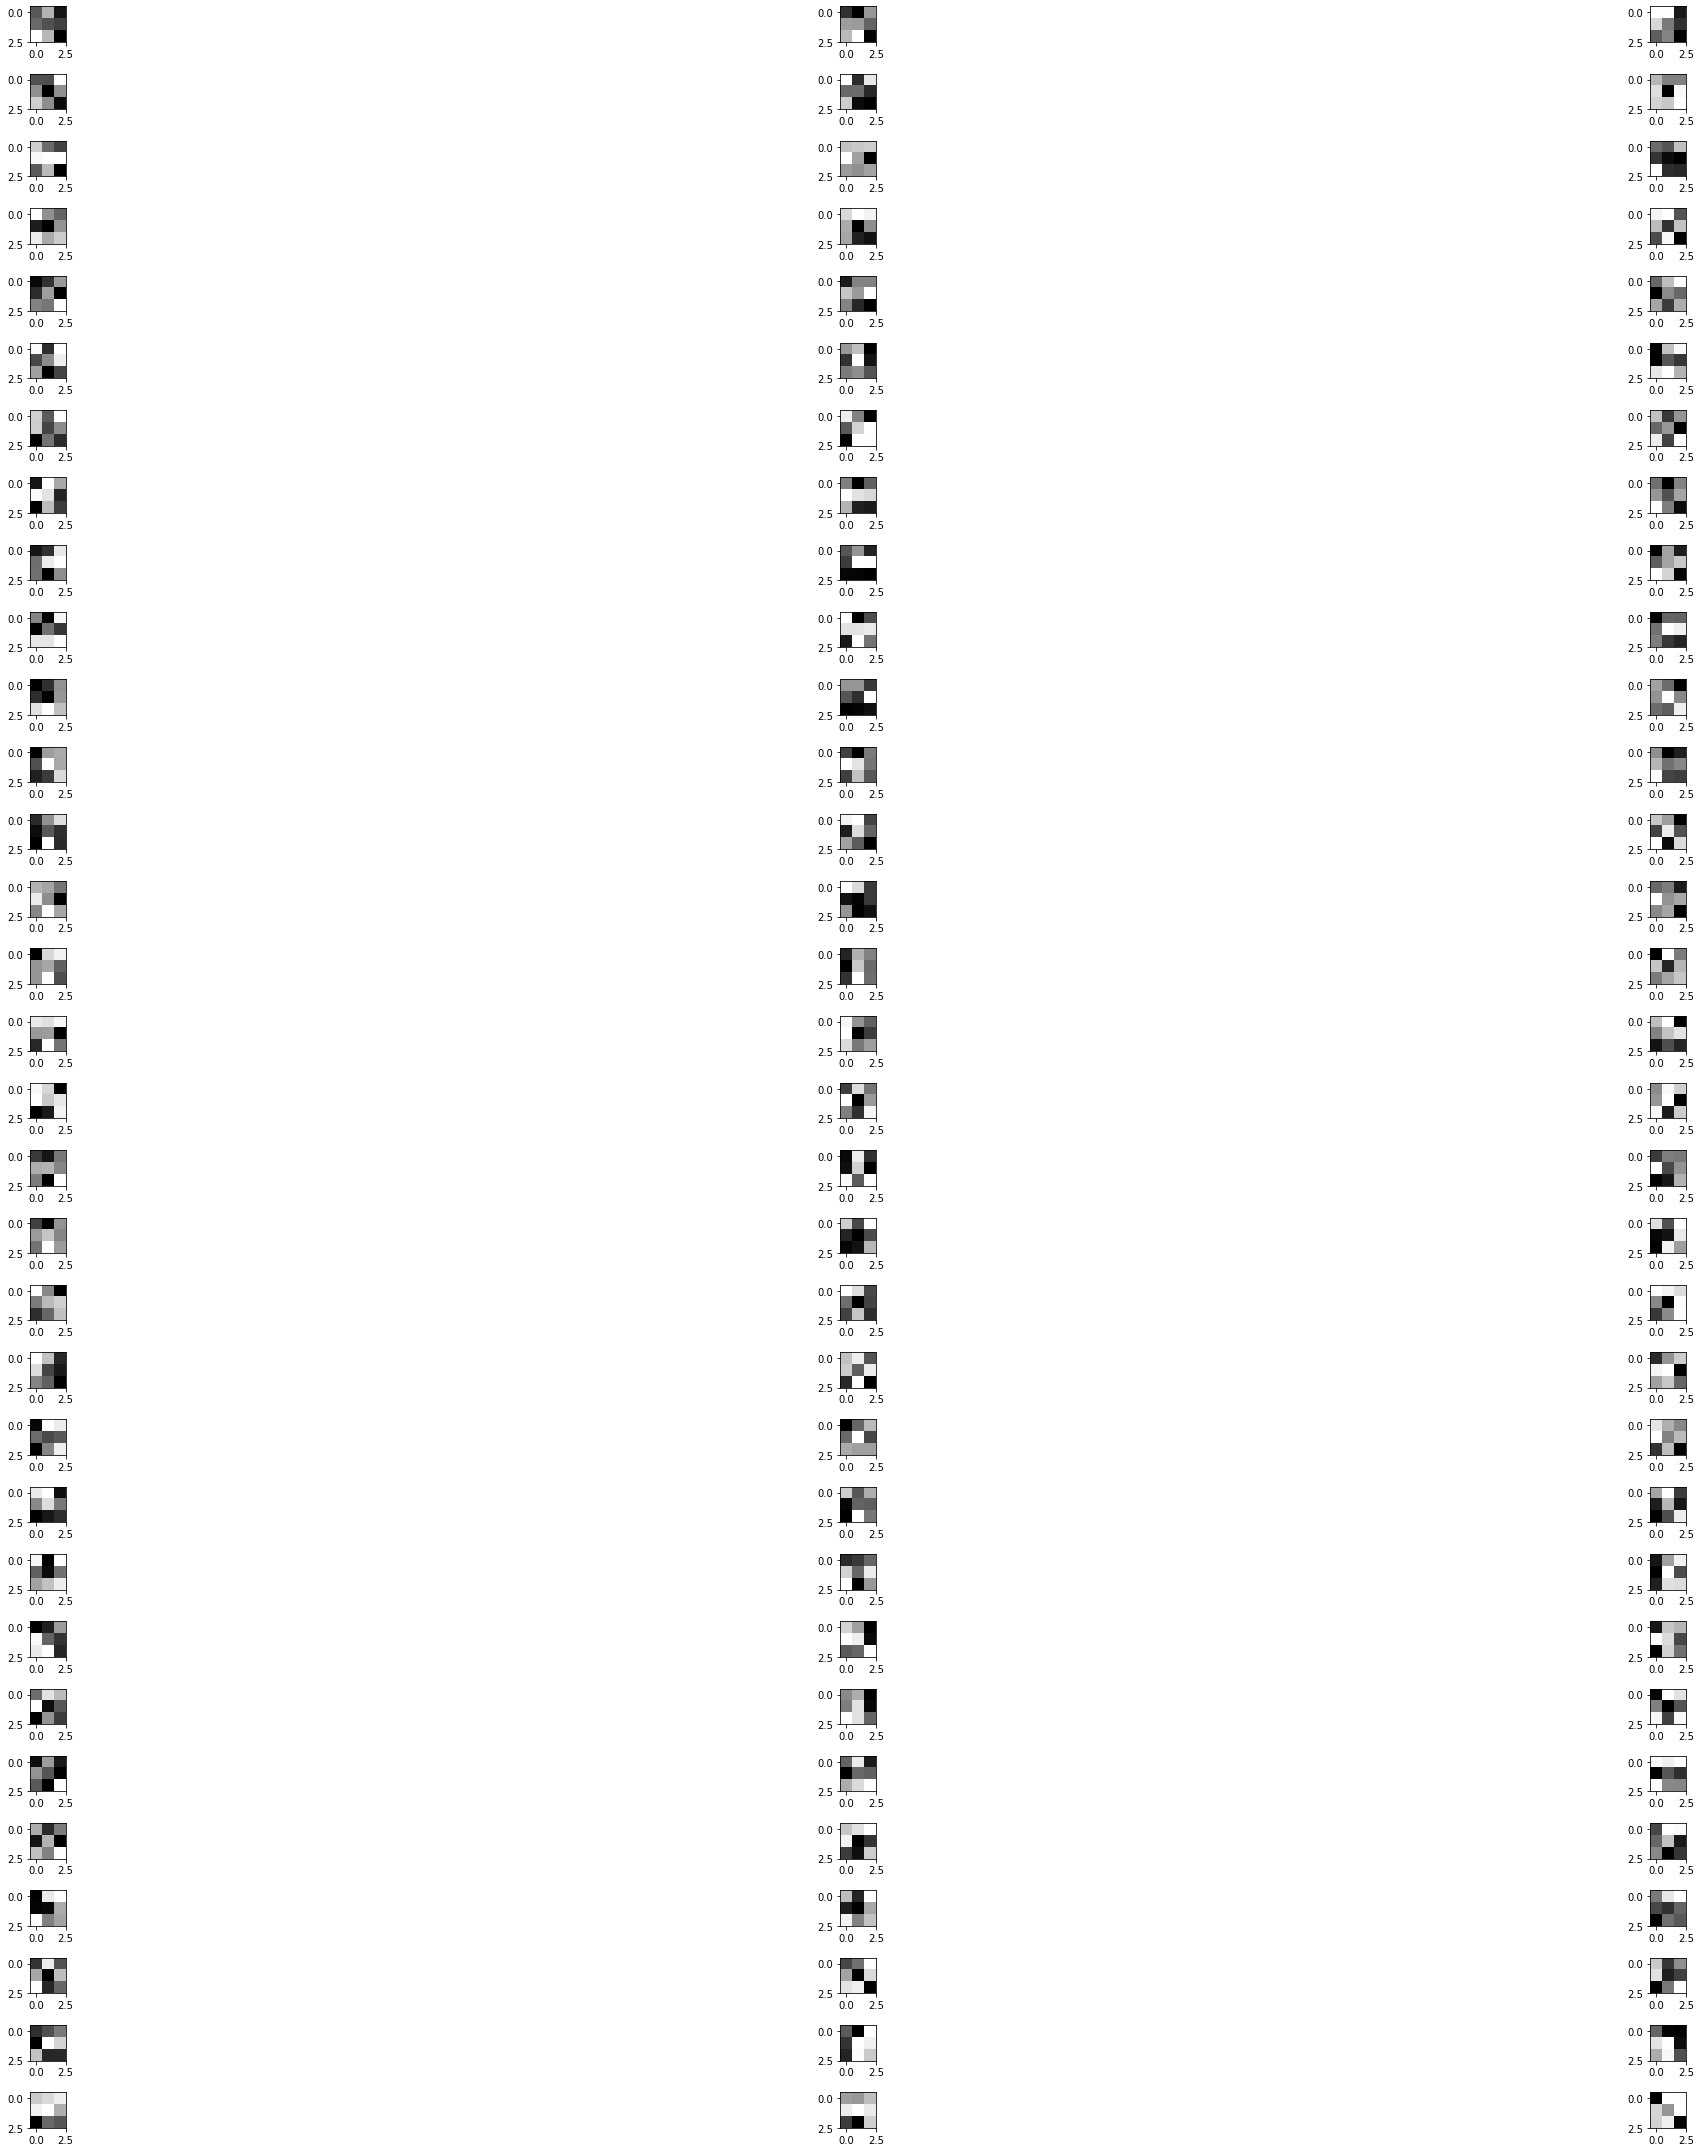

In [ ]:
#visualising 32 filters  from 1st layer
n_filters =32
ix=1
plt.figure(figsize=(40,30))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 32 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.tight_layout()
        plt.imshow(f[:,:,j],cmap='gray')
        
        ix+=1
#plot the filters 
plt.show()

If we wish to start looking at filters in the second convolutional layer, we have 64 filters, but each has 32 channels to match the input feature maps. To see all 32 channels in a row for all 64 filters would require (32×64) 2048 subplots in which it may be challenging to see any detail.

##Feature extraction 

The activation maps, called feature maps, capture the result of applying the filters to input, such as the input image or another feature map.

The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected or preserved in the feature maps. The expectation would be that the feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features.

In [ ]:
def image_features_true(image,count):
  
  plt.imshow(X_val[prop_class[count]])
  plt.title( Classes[y_val[prop_class[count]]])

  layer_outputs = [layer.output for layer in model.layers[:10]]
  activation_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)
  activations = activation_model(image)

  layer_names =[]
  for layer in model.layers[:10]:
    layer_names.append(layer.name)

  image_per_row =16

  for layer_name, layer_activation in zip(layer_names, activations):
    n_feat = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_feat // image_per_row
    display_grid = np.zeros((size*n_cols, image_per_row*size))

    for col in range(n_cols):
      for row in range(image_per_row):
        channel_image = layer_activation[0,:,:,col*image_per_row + row]
      
        display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image

    scale = 2. / size
    plt.figure( figsize=(scale * display_grid.shape[1] , scale*display_grid.shape[0]) )
    plt.title ( layer_name)
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gray') 

  return

###Sample image from correct prediction dataset

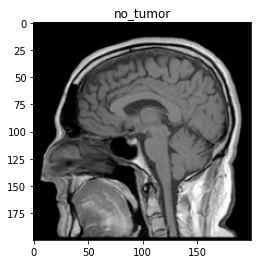

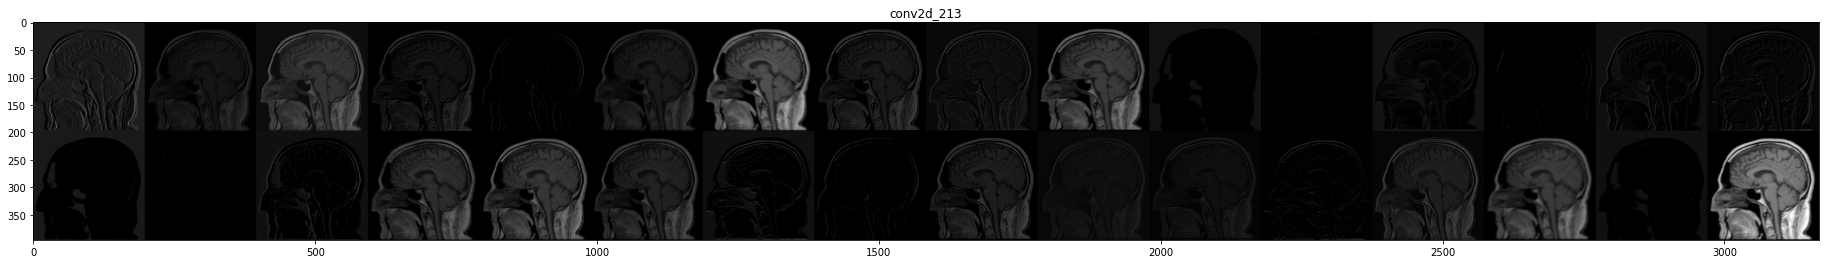

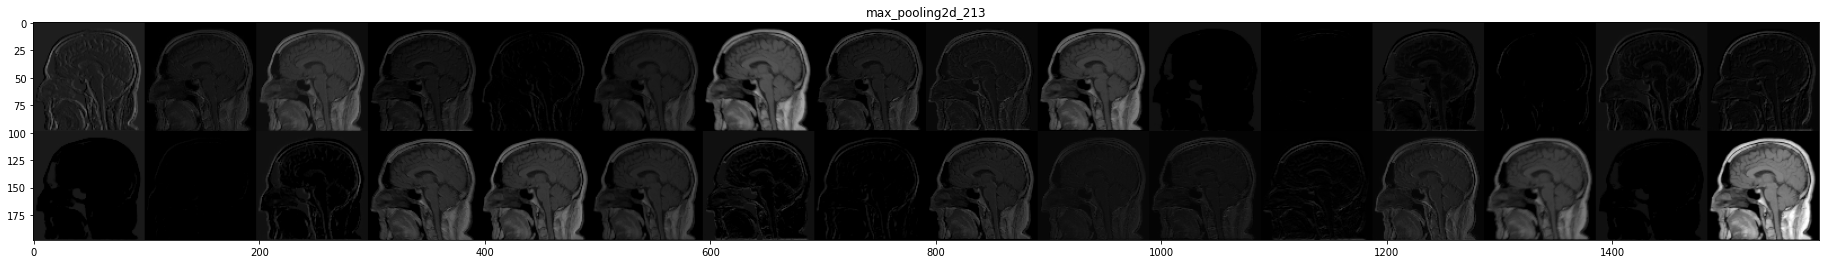

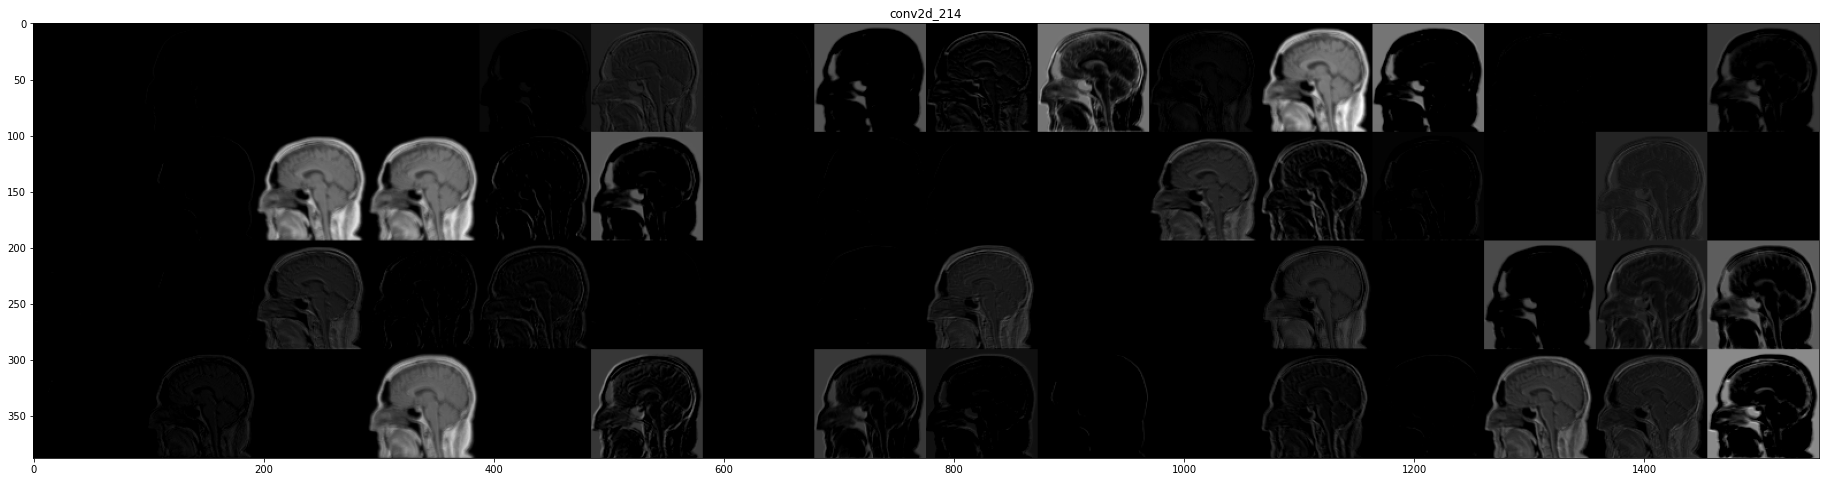

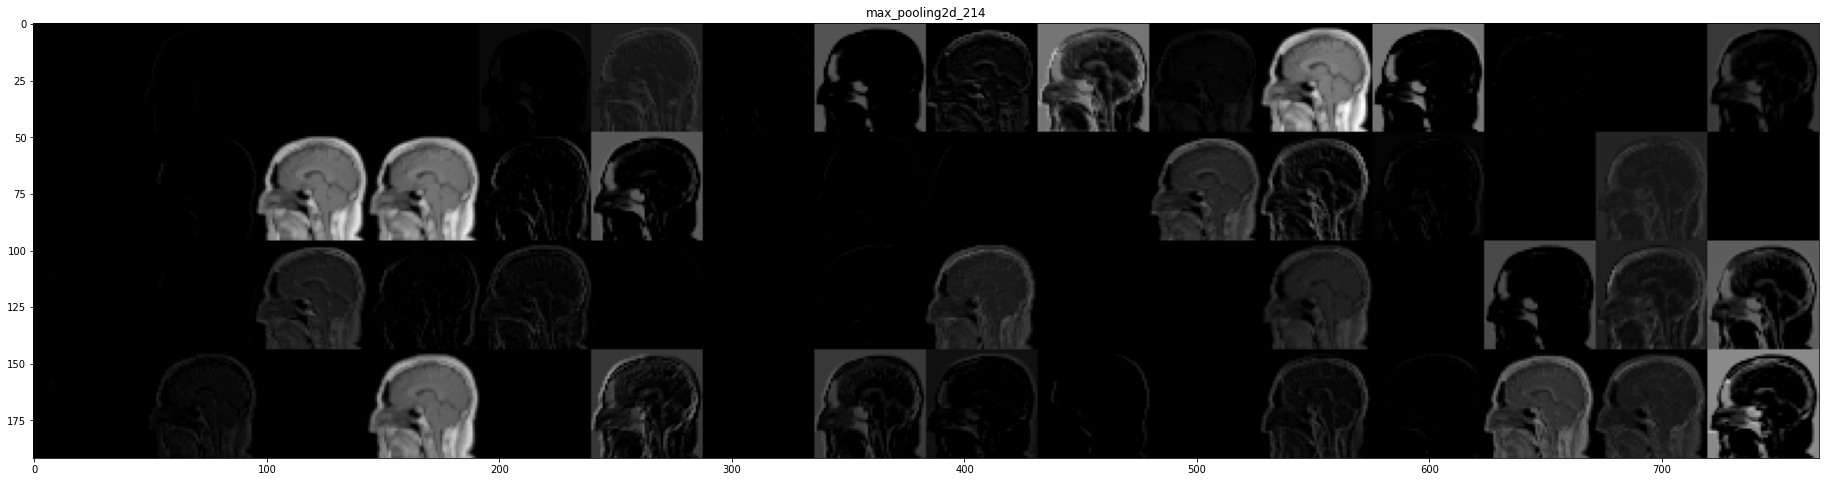

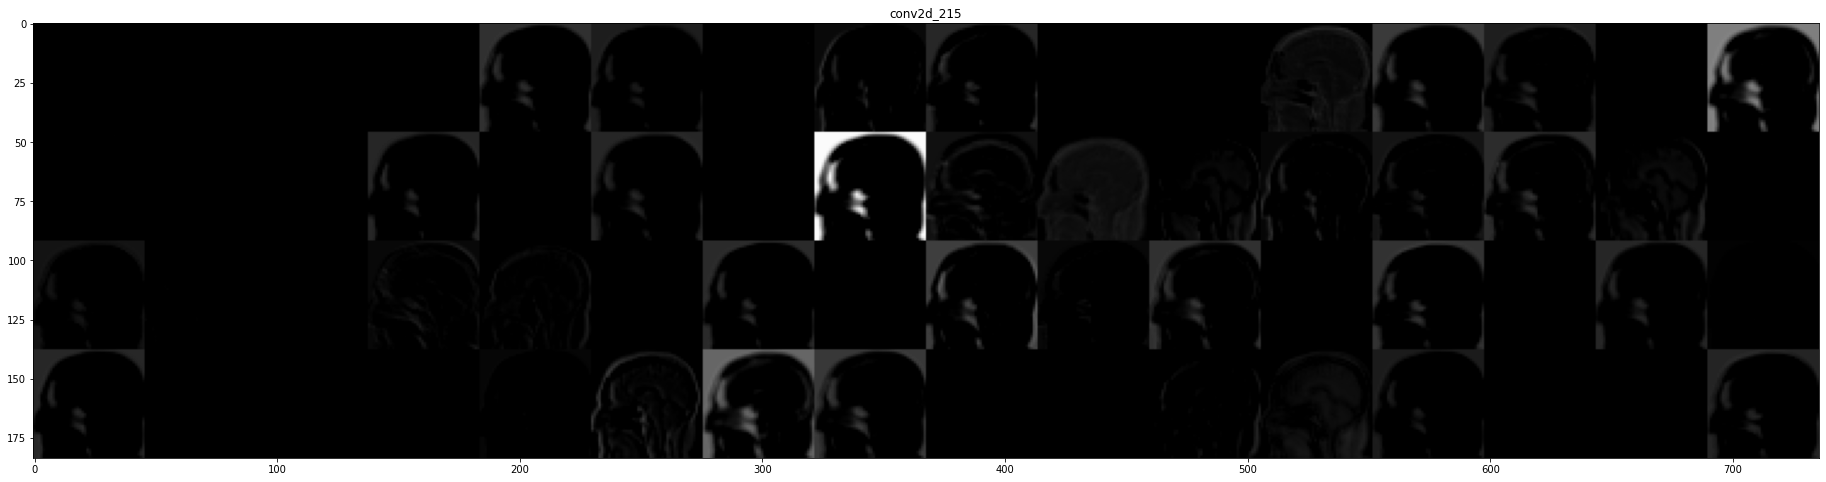

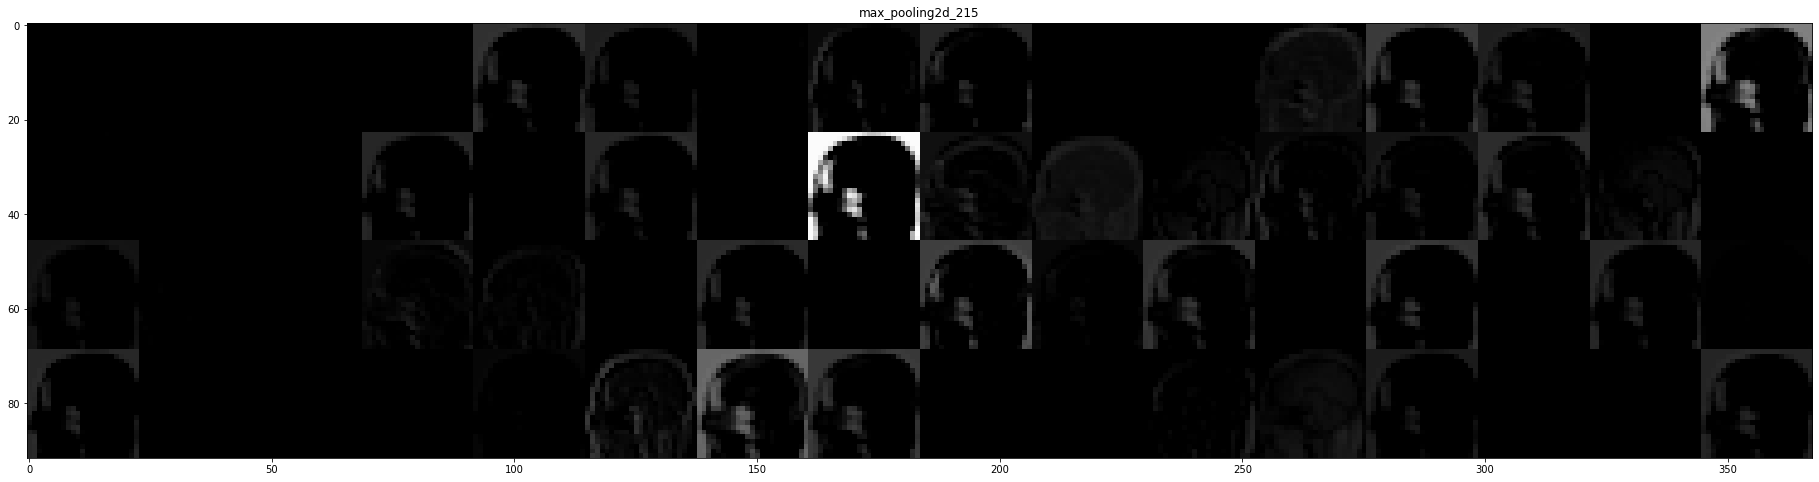

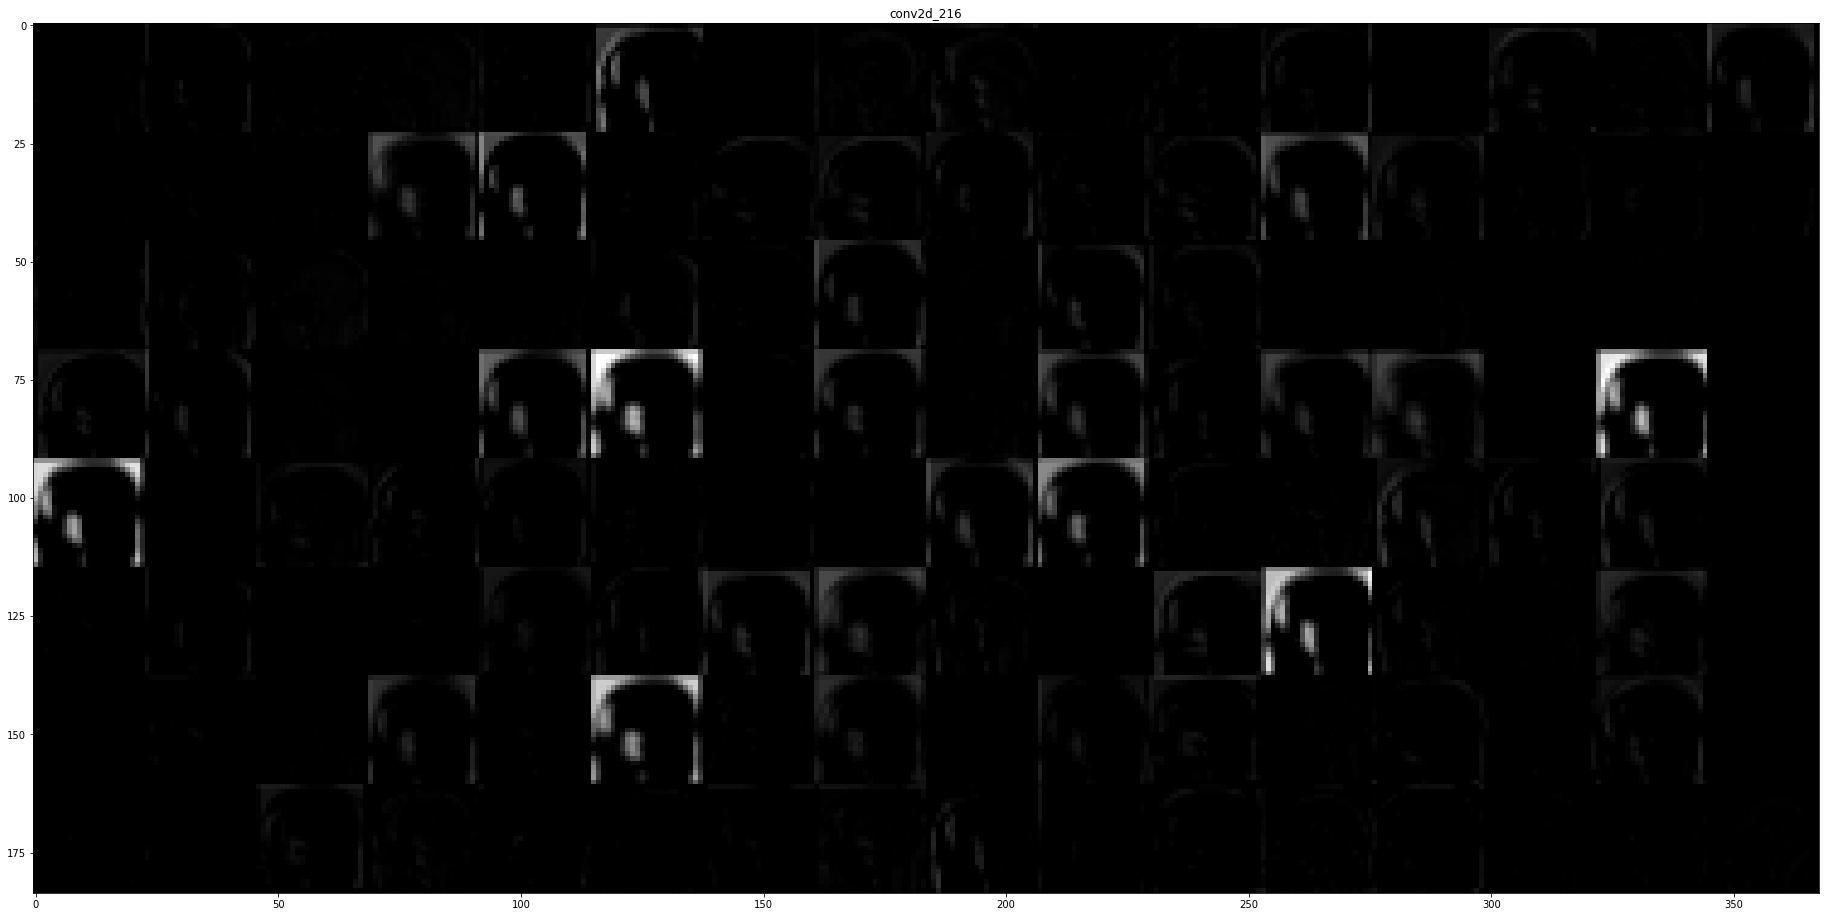

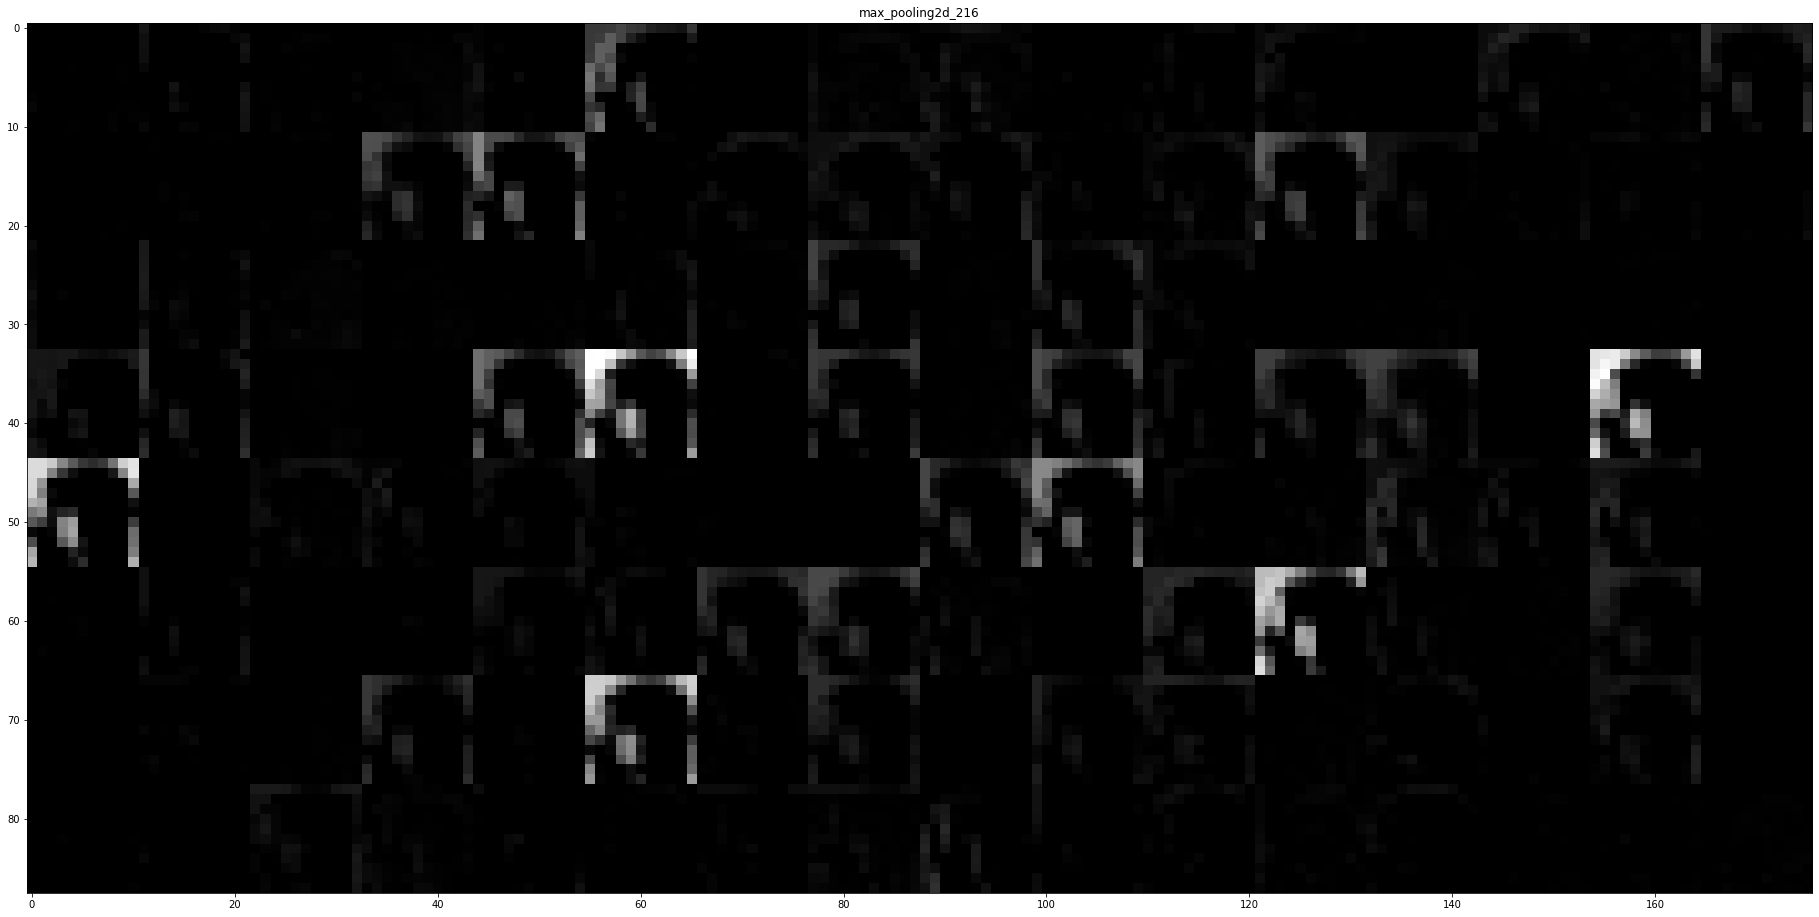

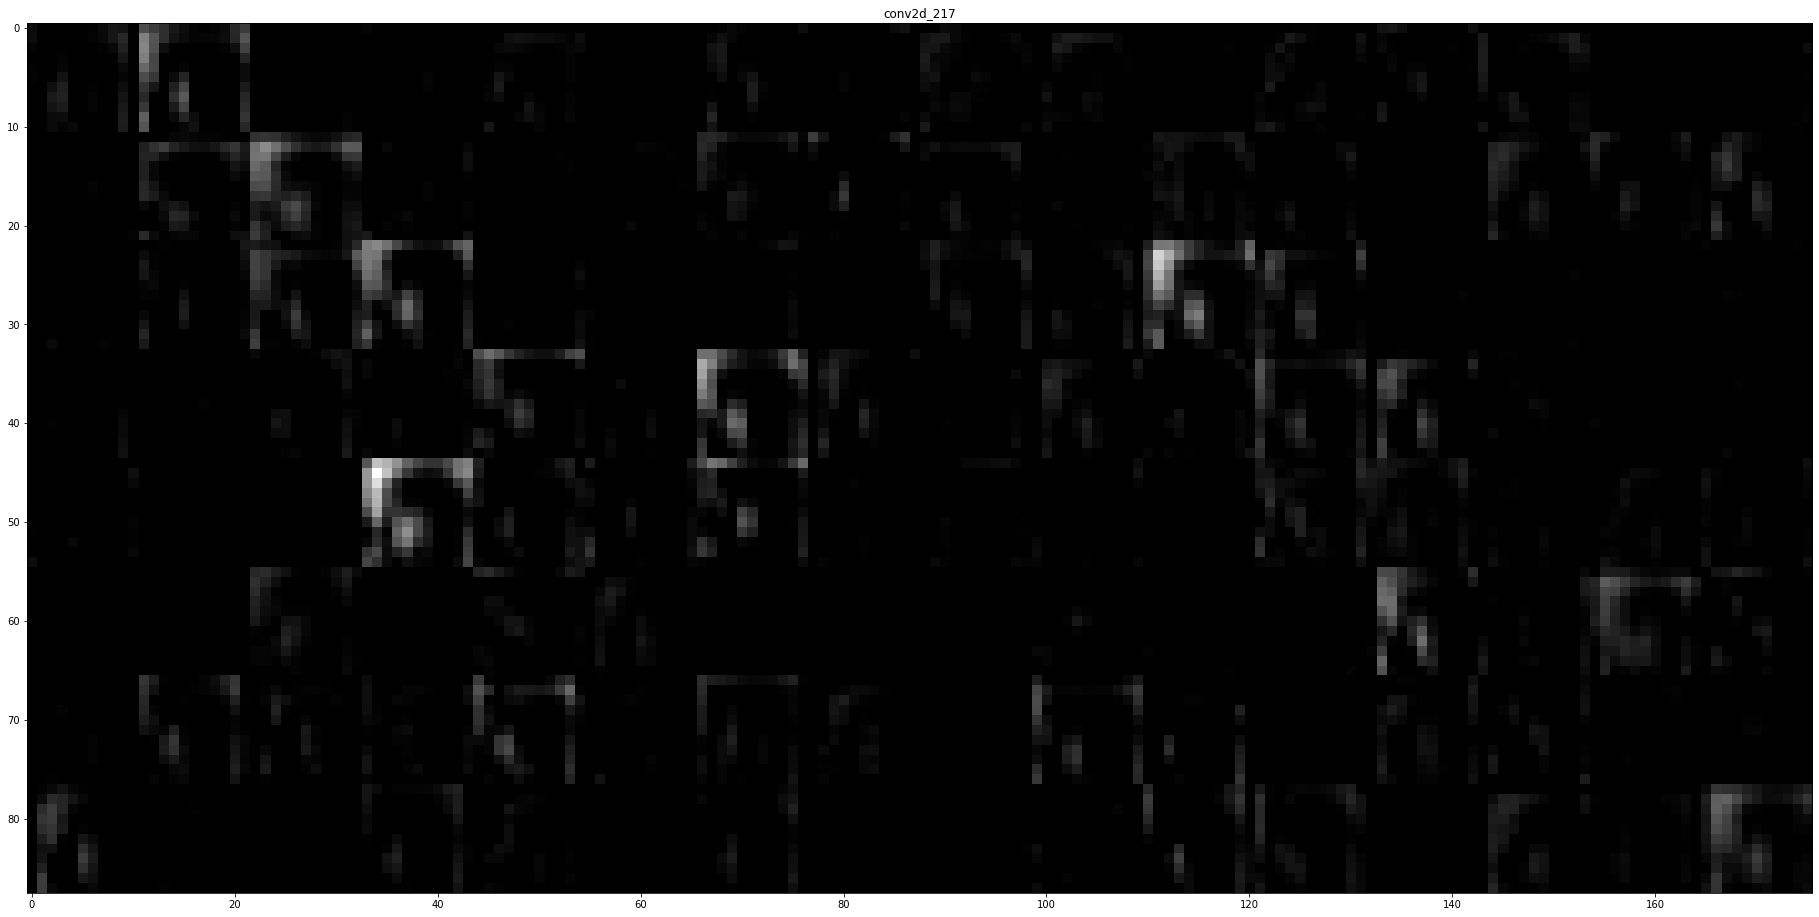

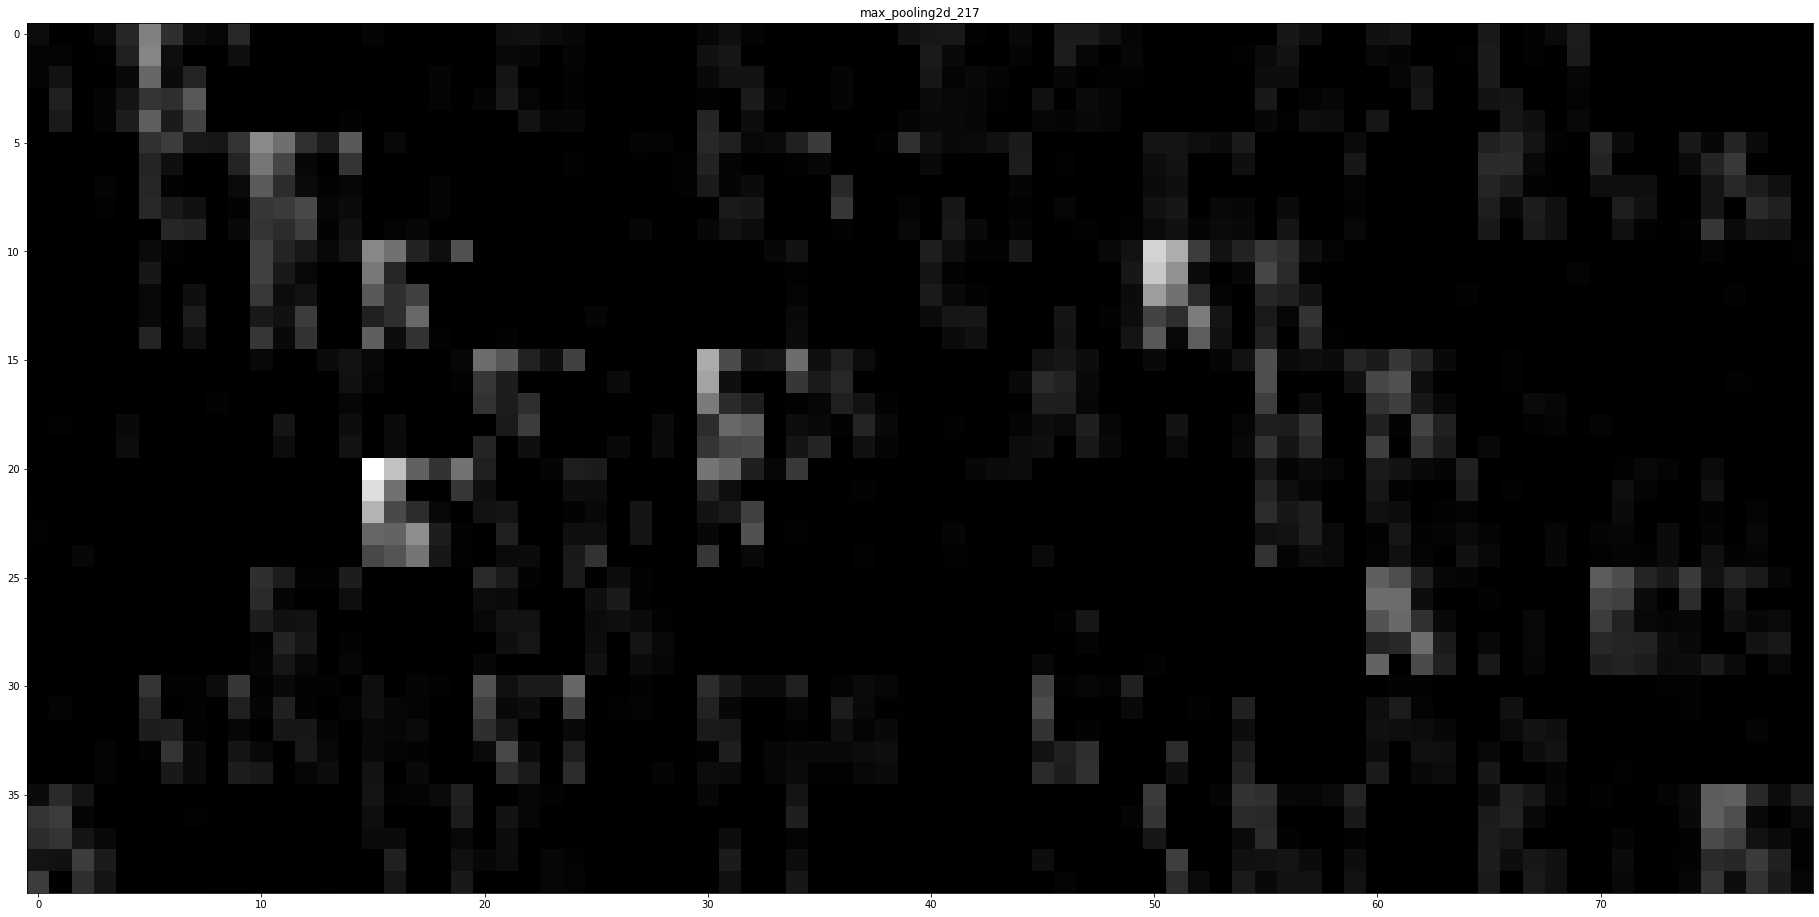

In [ ]:
#importing image from correct classified image dataset
img=X_val[prop_class[15]]
img = np.expand_dims(img, axis=0)
img = img/255
image_features_true(img,15)

In [ ]:
for i in range(len(X_correct)):
  img=X_val[prop_class[i]]
  img = np.expand_dims(img, axis=0)
  img = img/255
  
  image_features_true(img,i)

Output hidden; open in https://colab.research.google.com to view.

Glioma tumor:

Presence of white dots at the left bottom part of image.

Meningioma tumor:

Presence of white dot like structure at the center of the image.

No tumor:

No any dot like structure in image.

Pituitary tumor:

Presence of white dots at top part of image.

###Function for incorrect image features 

In [ ]:
def image_features_false(image,count):
  
  plt.imshow(X_val[mis_class[count]])
  plt.title( "Predicted tumor : "+Classes[yPred[mis_class[count]]]+"\n"+"Actual tumor : "+Classes[y_val[mis_class[count]]])

  layer_outputs = [layer.output for layer in model.layers[:10]]
  activation_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)
  activations = activation_model(image)

  layer_names =[]
  for layer in model.layers[:10]:
    layer_names.append(layer.name)

  image_per_row =16

  for layer_name, layer_activation in zip(layer_names, activations):
    n_feat = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_feat // image_per_row
    display_grid = np.zeros((size*n_cols, image_per_row*size))

    for col in range(n_cols):
      for row in range(image_per_row):
        channel_image = layer_activation[0,:,:,col*image_per_row + row]
        
        display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image

    scale = 2. / size
    plt.figure( figsize=(scale * display_grid.shape[1] , scale*display_grid.shape[0]) )
    plt.title ( layer_name)
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gray') 

  return

###Sample image form incorrect classification 

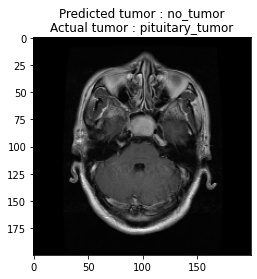

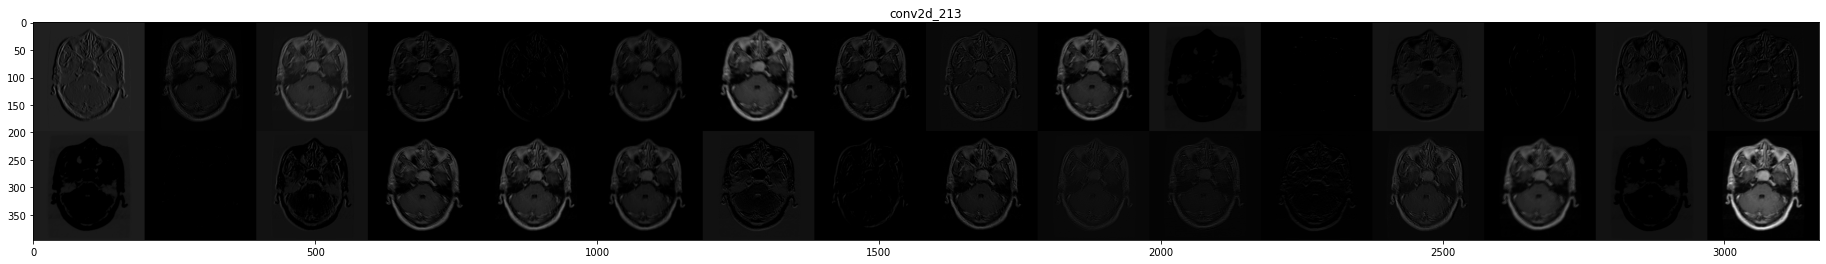

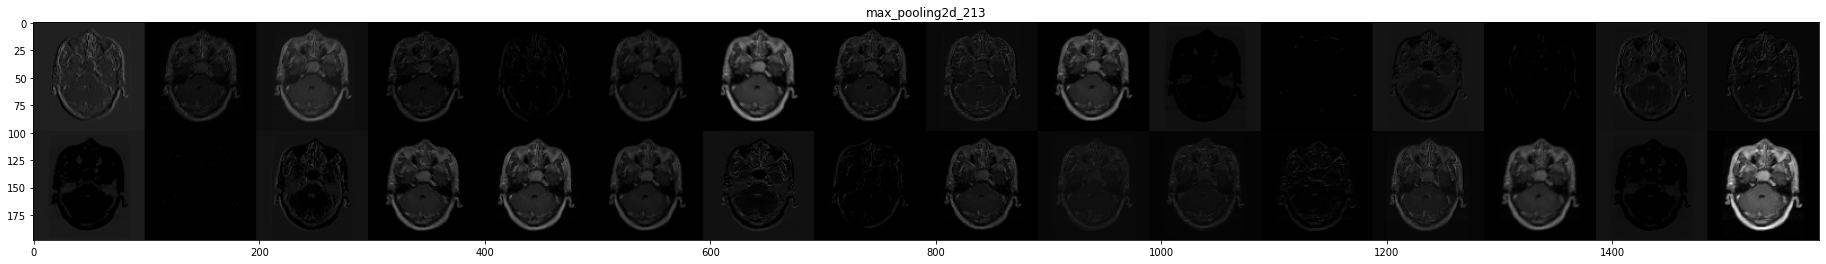

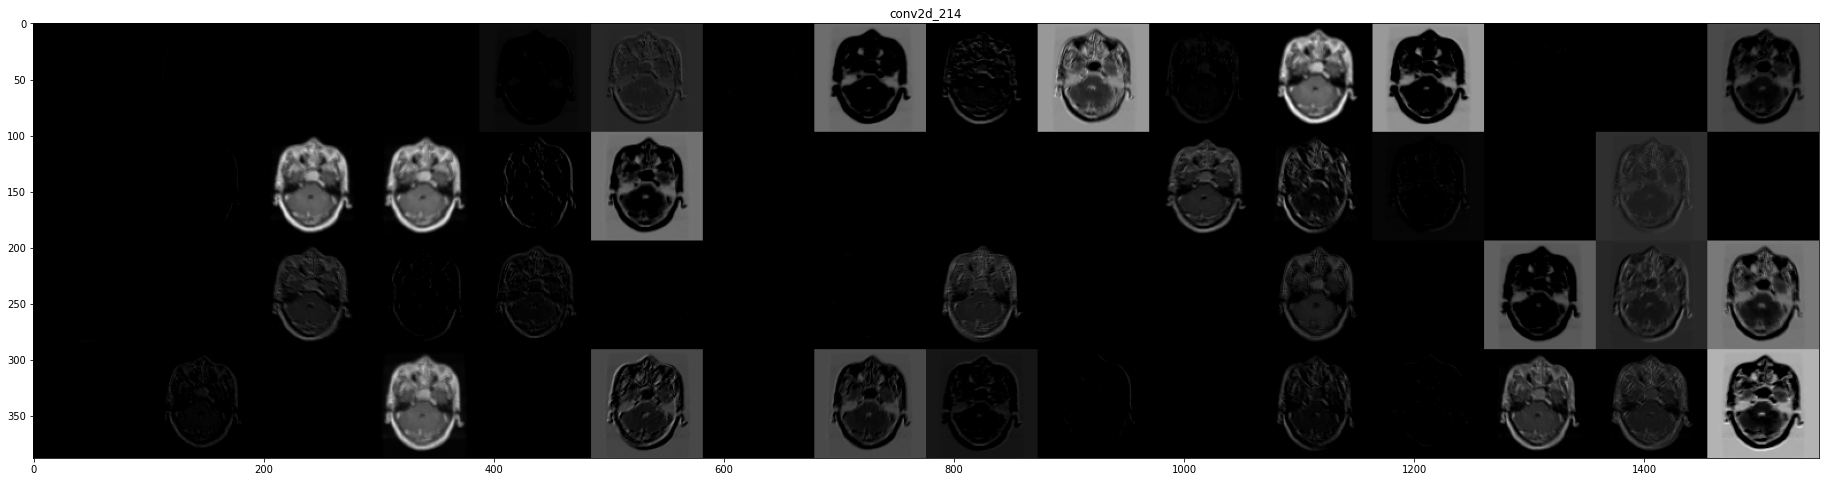

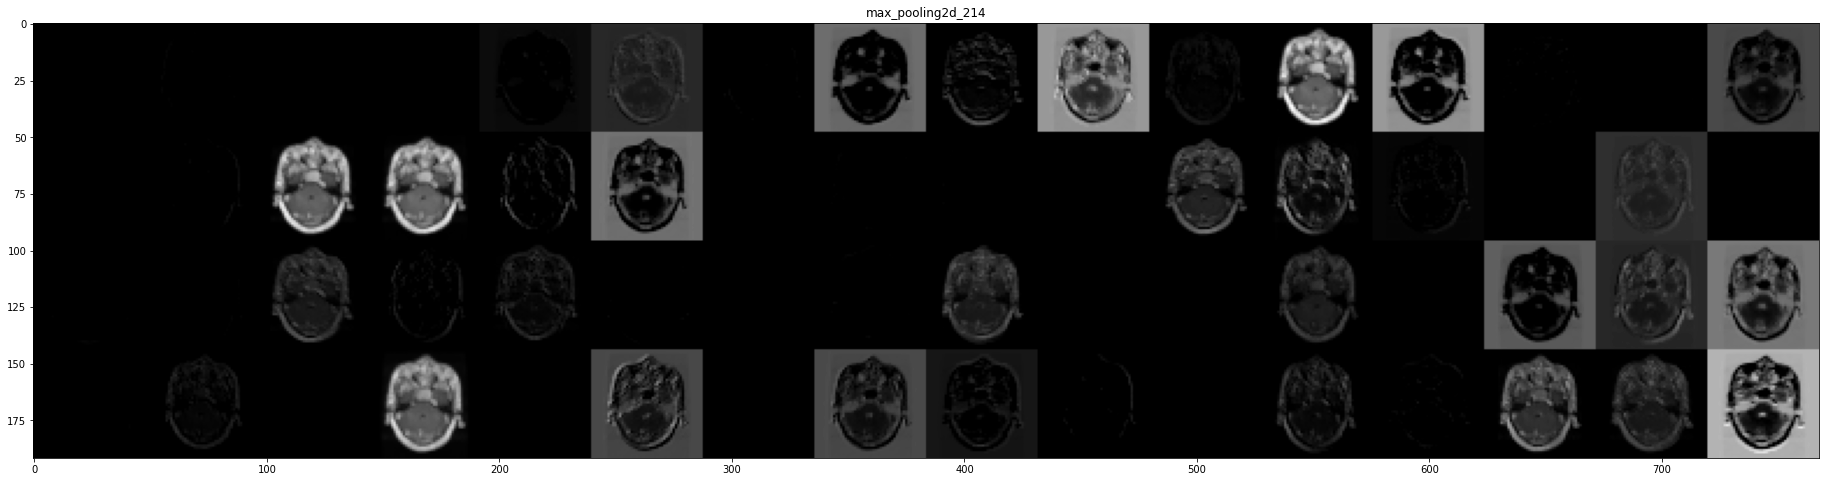

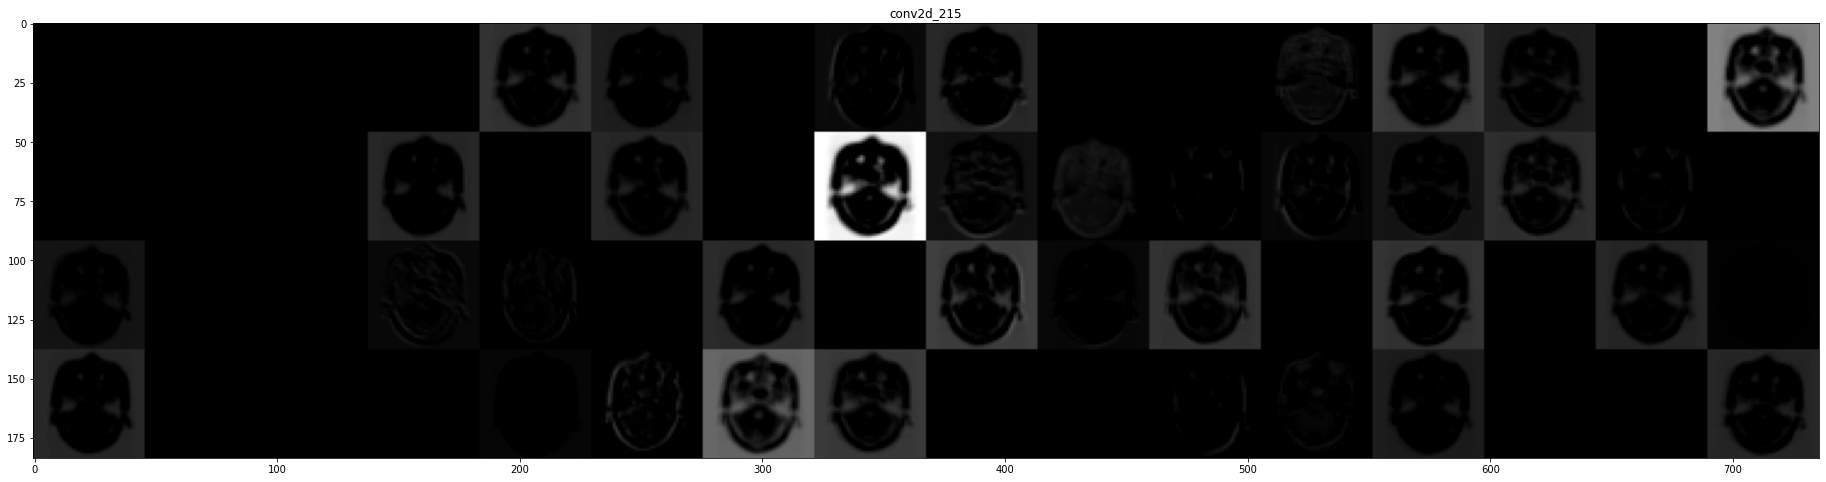

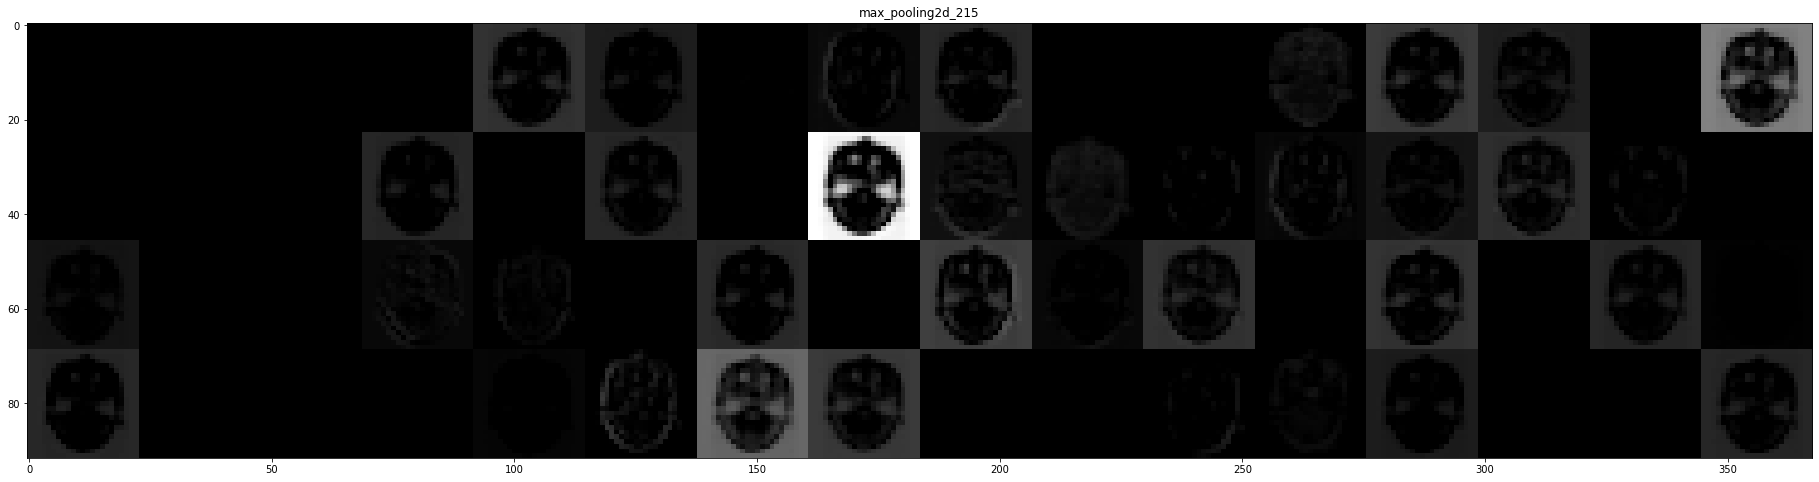

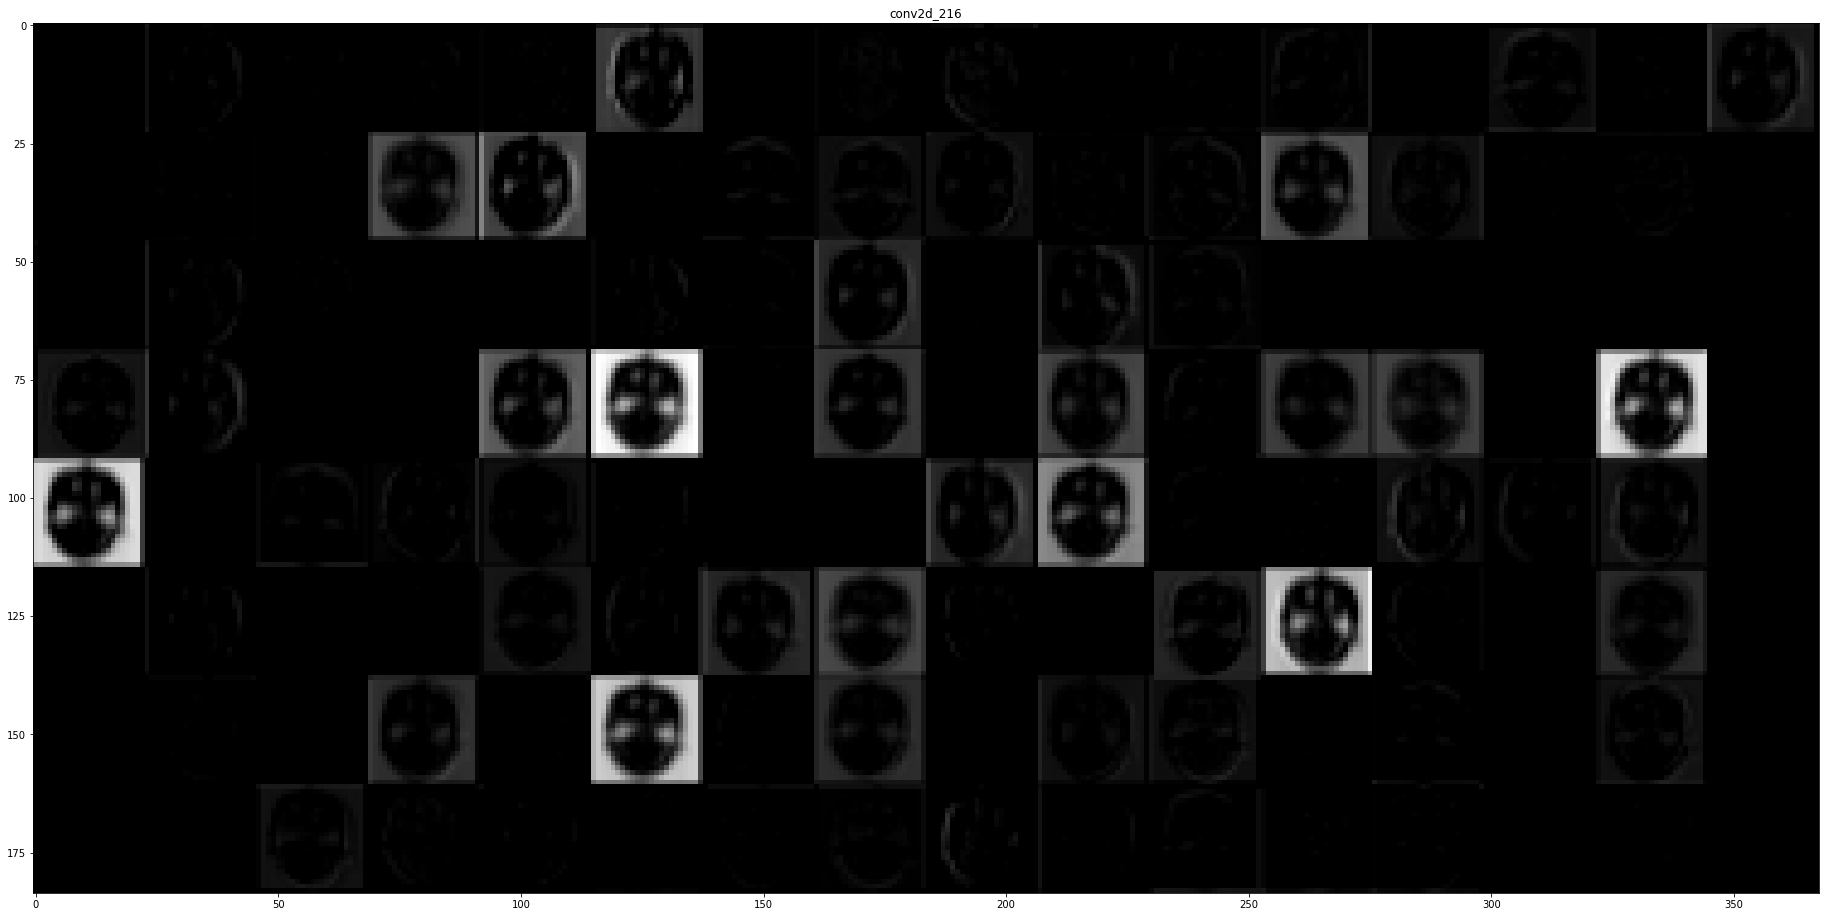

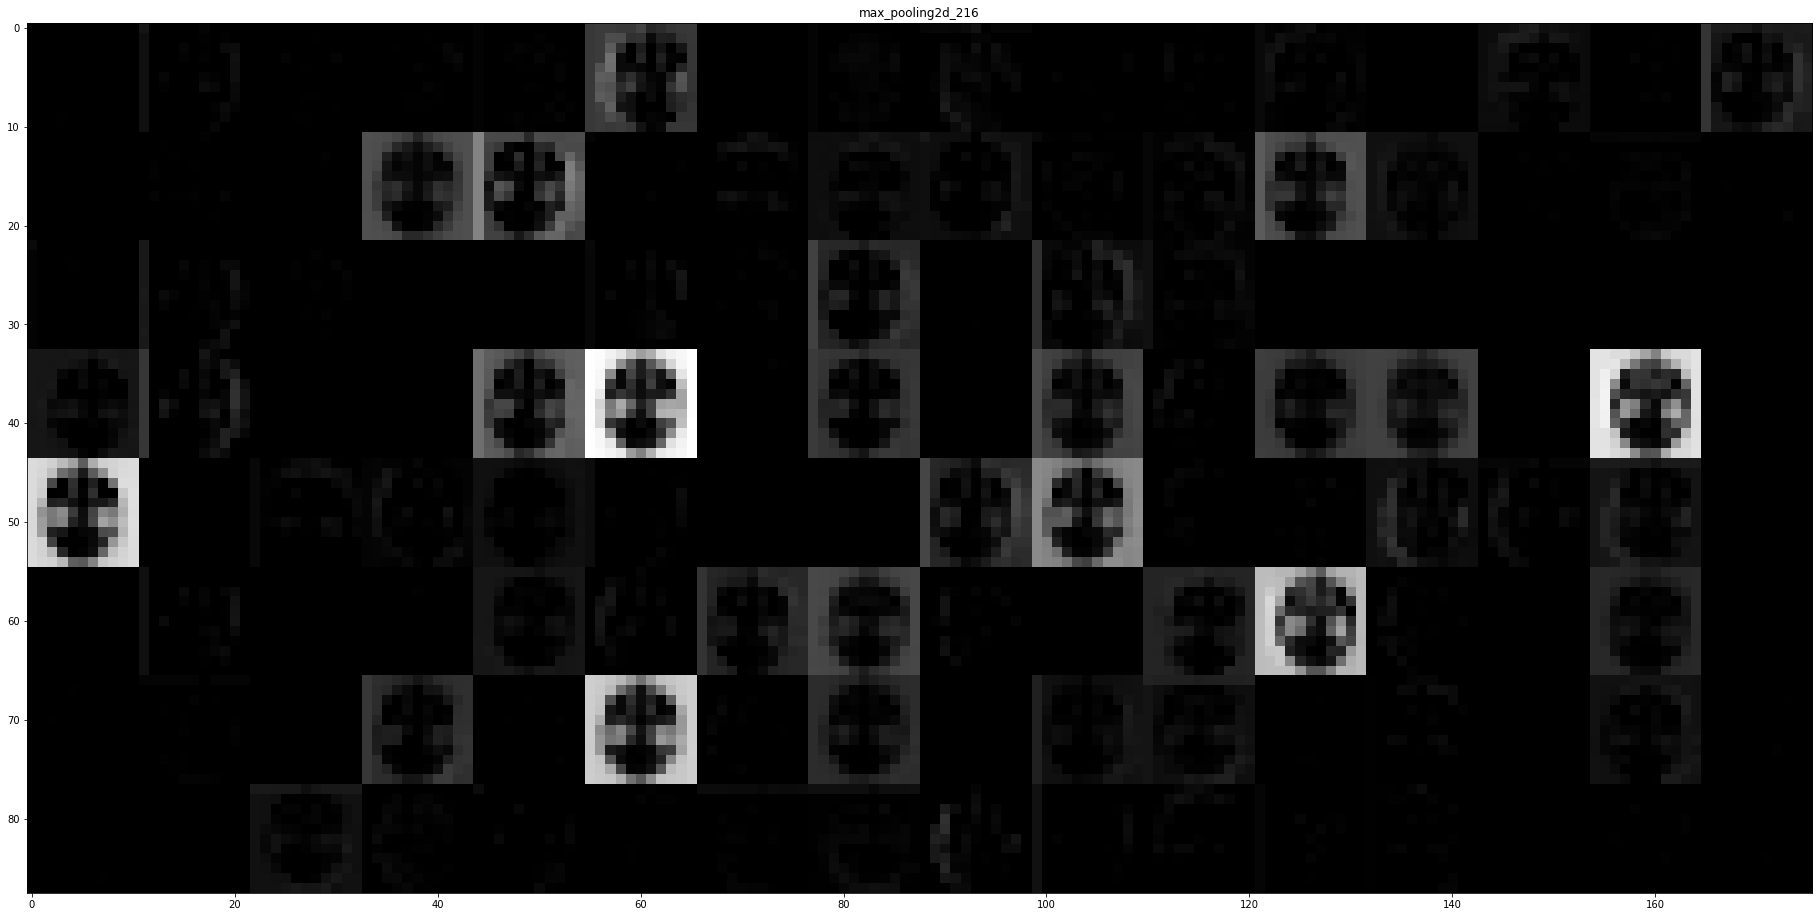

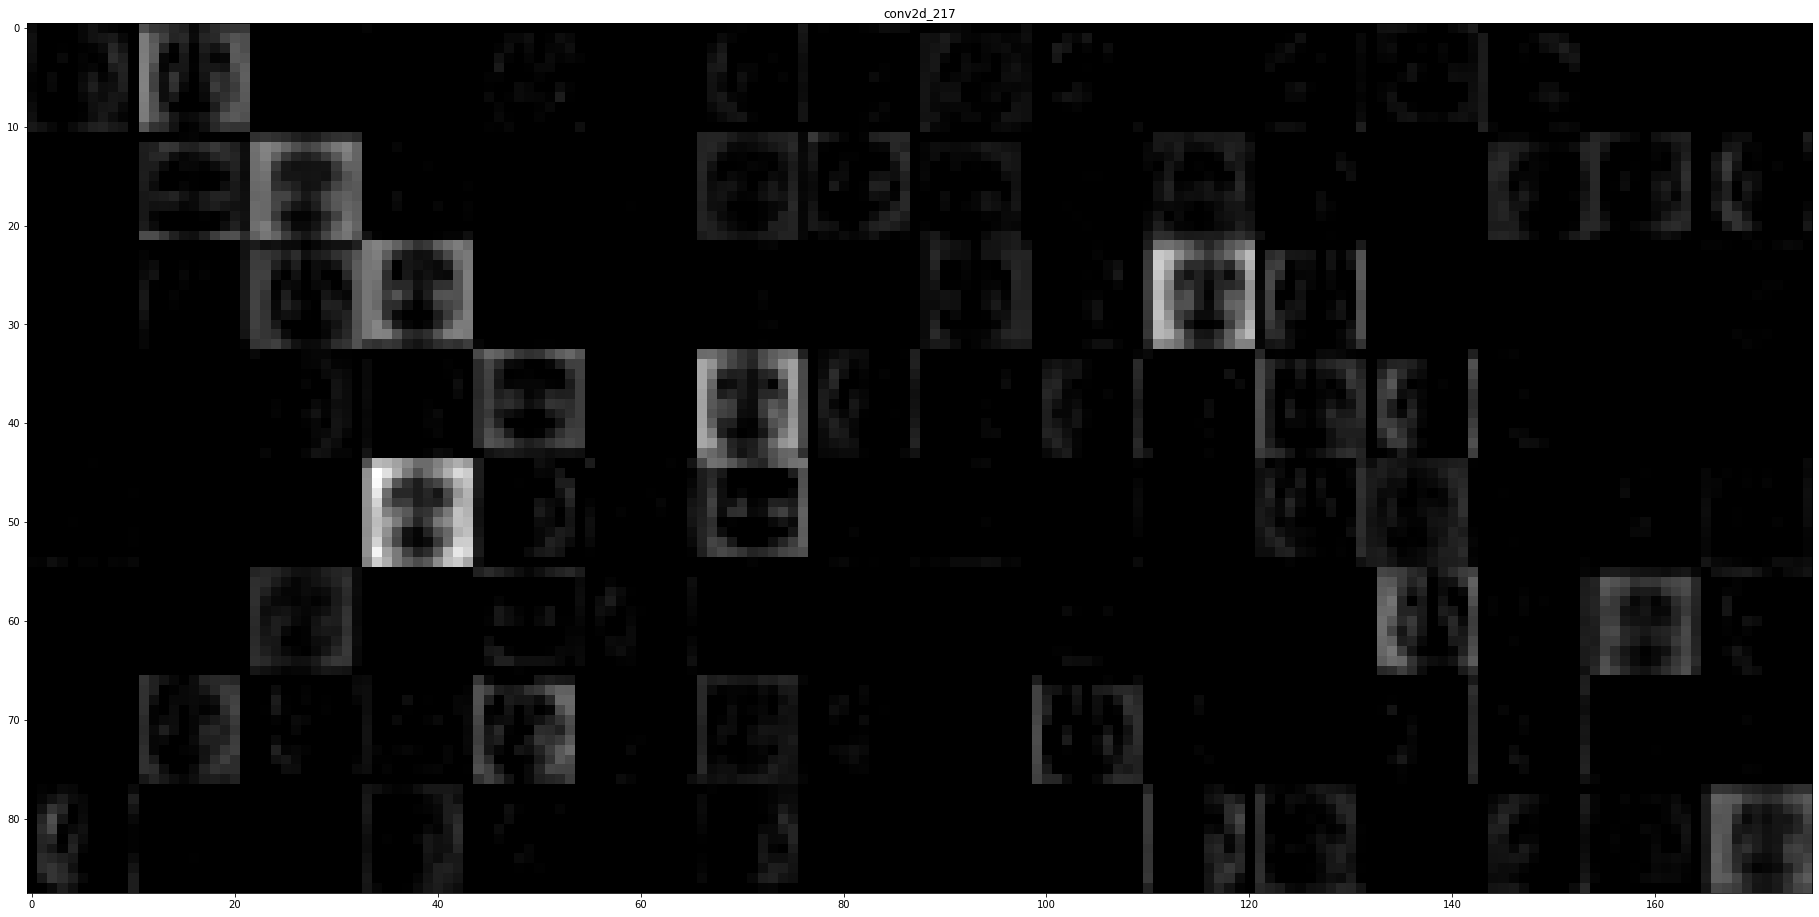

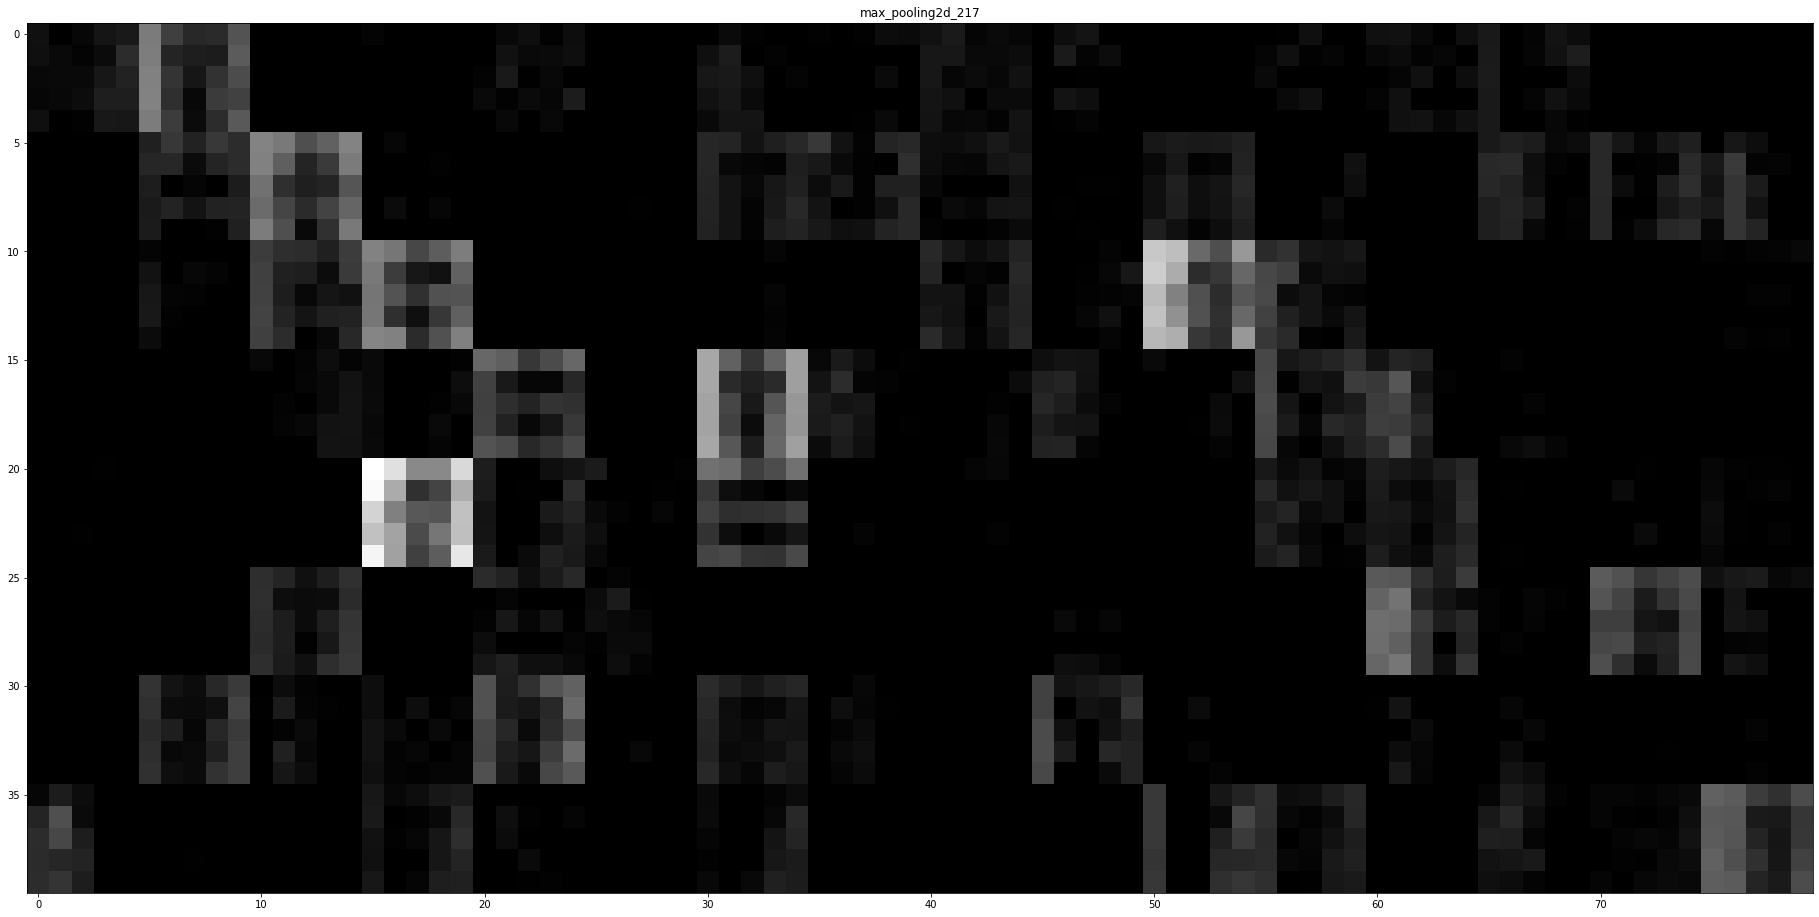

In [ ]:
#Image from incorrect prediction 
img=X_val[mis_class[15]]
img = np.expand_dims(img, axis=0)
img = img/255
image_features_false(img,15)

In [ ]:
for i in range(len(X_incorrect)):
  img=X_val[mis_class[i]]
  img = np.expand_dims(img, axis=0)
  img = img/255
  
  image_features_false(img,i)

Output hidden; open in https://colab.research.google.com to view.

Pituitary to No tumor class:

In actual Pituitary tumor classification, there was presence of white dots at top but, there are no significant such structure at top and dots at side are connected to outer and it does not match with other classification leaving it to No tumor classification.

Meningioma to No tumor class:

In actual Meningioma classification important features was presence of dot like structure at the center of image but, in this case, there are no any such structure at center which belong to No tumor class.